<h1><center><bold>ImageMining:
Atelier N°2: Classification</bold>

## Abdelazyz RKHISS
    
    
    
Rkhissabdelazyz781@gmail.com</center></h1>

<div>
    <img src='moi.jpg' hight='400' style ="text-align : right">
</div>



### Table des matières :
<h5></br>
    
[1 - Importation des données](#1)</br>


 
[2.1 - SVM](#2)</br> 

[2.2 - KNN](#3)</br>

[2.3 - Decision Tree](#4)</br>

[2.4 - Comparaison entre les trois algorithmes de classification ](#5)</br>

[2.5 - Application de training/test  Cross-Validation  ](#6)</br>  


[3 - Prédire les étiquettes des images dans le dossier « DataToPredict »](#7)</br>    

[3.1 - SVM prediction](#8)</br>

[3.2- Visualization des images et classes SVM  ](#9)</br>

[3.1 - KNN prediction](#10)</br>

[3.1 - Visualization des images et classes KNN](#11)</br>

[3.1 - Decision Tree prediction](#12)</br>

[3.1 - Visualization des images et classes DT](#12)</br>

</h5>

In [2]:
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

<a name='1'></a>

.

.

### utiliser CIBIR de premier atelier pour extraire le vecteur caractéristique des images et l'enregistrer CSV


In [3]:
with open("cars.csv") as cars:
    cars = np.loadtxt(cars, delimiter=",")

In [4]:
with open("ships.csv") as ships:
    ships = np.loadtxt(ships, delimiter=",")

In [5]:
ensemble = np.vstack((cars, ships))

In [6]:
X = np.delete(ensemble, 49, 1)

Y = ensemble[:, 49]

In [7]:
import sklearn.svm as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import sklearn.neighbors as knn
import sklearn.tree as tree


<a name='2'></a>

.

.


# SVM


In [8]:
model_svm = sv.SVC()

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [14]:
model_svm.fit(xtrain, ytrain)

SVC()

In [15]:
ytrain.shape

(392,)

In [1]:
ypred = model_svm.predict(xtest)

NameError: name 'model_svm' is not defined

In [17]:
SVM_accuracy = accuracy_score(ytest, ypred)
print(SVM_accuracy)

0.9183673469387755


In [18]:
CM = confusion_matrix(ytest, ypred)

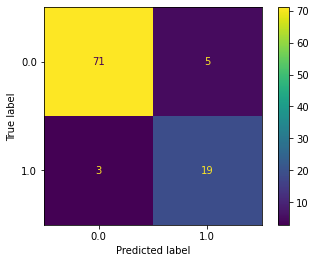

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_svm.classes_)
disp.plot()
plt.show()


<a name='3'></a>

.

.




# KNN


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [16]:
model_KNN = knn.KNeighborsClassifier(n_neighbors=2)

In [17]:
model_KNN.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [18]:
ypred = model_KNN.predict(xtest)

In [19]:
KNN_accuracy = accuracy_score(ytest, ypred)
print(KNN_accuracy)

0.9285714285714286


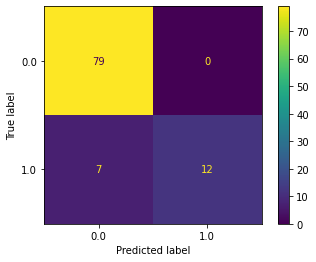

In [20]:
CM = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_svm.classes_)
disp.plot()
plt.show()

<a name='4'></a>

.

.

# Decision Tree


In [21]:
model_DT = tree.DecisionTreeClassifier(random_state=0)

In [22]:
model_DT.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=0)

In [23]:
ypred = model_DT.predict(xtest)

In [24]:
DT_accuracy = accuracy_score(ytest, ypred)
print(DT_accuracy)

0.9285714285714286


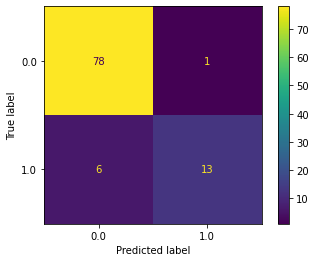

In [25]:
CM = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_svm.classes_)
disp.plot()
plt.show()


<a name='5'></a>

.
.

# comparaison entre les trois algorithmes de classification

In [26]:
from tabulate import tabulate

In [27]:
headers = ["Algorithme", "accuracy"]
table = [["SVM accuracy", SVM_accuracy],["KNN accuracy", KNN_accuracy], ["DT accuracy", DT_accuracy]]

In [28]:
print(tabulate(table, headers, tablefmt=""))

Algorithme      accuracy
------------  ----------
SVM accuracy    0.918367
KNN accuracy    0.928571
DT accuracy     0.928571


<a name='6'></a>


.

# Application de training/test  Cross-Validation sur dataset avec les meme algorithmes

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scoresSVM = cross_val_score(model_svm, X, Y, cv=14)

In [31]:
scoresSVM

array([0.97142857, 0.97142857, 0.94285714, 1.        , 0.97142857,
       1.        , 1.        , 0.8       , 0.88571429, 0.91428571,
       0.88571429, 0.97142857, 0.94285714, 1.        ])

In [32]:
scoresKNN = cross_val_score(model_KNN, X, Y, cv=14)

In [33]:
scoresKNN

array([0.97142857, 0.97142857, 0.91428571, 0.97142857, 0.97142857,
       1.        , 0.97142857, 0.88571429, 0.94285714, 0.94285714,
       0.85714286, 0.97142857, 0.94285714, 0.97142857])

In [34]:
scoresDT = cross_val_score(model_DT, X, Y, cv=14)

In [35]:
scoresDT

array([0.97142857, 0.97142857, 1.        , 0.94285714, 0.97142857,
       1.        , 1.        , 0.8       , 0.82857143, 0.82857143,
       0.91428571, 0.88571429, 0.88571429, 0.82857143])

### plot visualizer et comparer

In [36]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

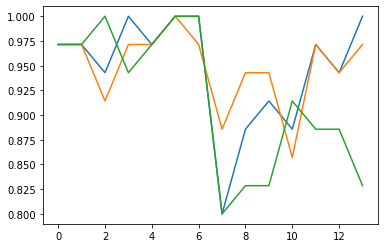

In [37]:
plt.plot(a, scoresSVM)

# Plot another line on the same chart/graph
plt.plot(a, scoresKNN)

plt.plot(a, scoresDT)

plt.show()

<a name='7'></a>


.

# Prédire les étiquettes des images dans le dossier « DataToPredict »

### utiliser CBIR deja implimenter pour extraire le vecteur descripteur, l'enregistrer en CSV et limporter ici


# SVM prediction :

In [38]:
loaded_images=list()
path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//classification//DataToPredict'

for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles

In [39]:
with open("topredict.csv") as topredict:
    topredict = np.loadtxt(topredict, delimiter=",")

In [42]:
classpediteSVM = model_svm.predict(topredict)

classpediteSVM

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0.])

In [43]:
imagepredite_classSVM = {}

for i in range(len(loaded_images)):
    img_data = image.imread(path+'/' + filename)
    
    imagepredite_classSVM[i] = [filename, classpediteSVM[i]]
    

In [44]:
imagepredite_classSVM

{0: ['535099.jpg', 0.0],
 1: ['535099.jpg', 0.0],
 2: ['535099.jpg', 0.0],
 3: ['535099.jpg', 0.0],
 4: ['535099.jpg', 0.0],
 5: ['535099.jpg', 0.0],
 6: ['535099.jpg', 0.0],
 7: ['535099.jpg', 0.0],
 8: ['535099.jpg', 0.0],
 9: ['535099.jpg', 0.0],
 10: ['535099.jpg', 1.0],
 11: ['535099.jpg', 1.0],
 12: ['535099.jpg', 1.0],
 13: ['535099.jpg', 1.0],
 14: ['535099.jpg', 1.0],
 15: ['535099.jpg', 0.0],
 16: ['535099.jpg', 1.0],
 17: ['535099.jpg', 1.0],
 18: ['535099.jpg', 0.0],
 19: ['535099.jpg', 0.0]}

In [45]:
df = pd.DataFrame.from_dict(imagepredite_classSVM)

In [46]:
df.to_csv ('predicted_SVM.csv', index = False, header=True)

<a name='8'></a>


# Visualization des images et classes  SVM

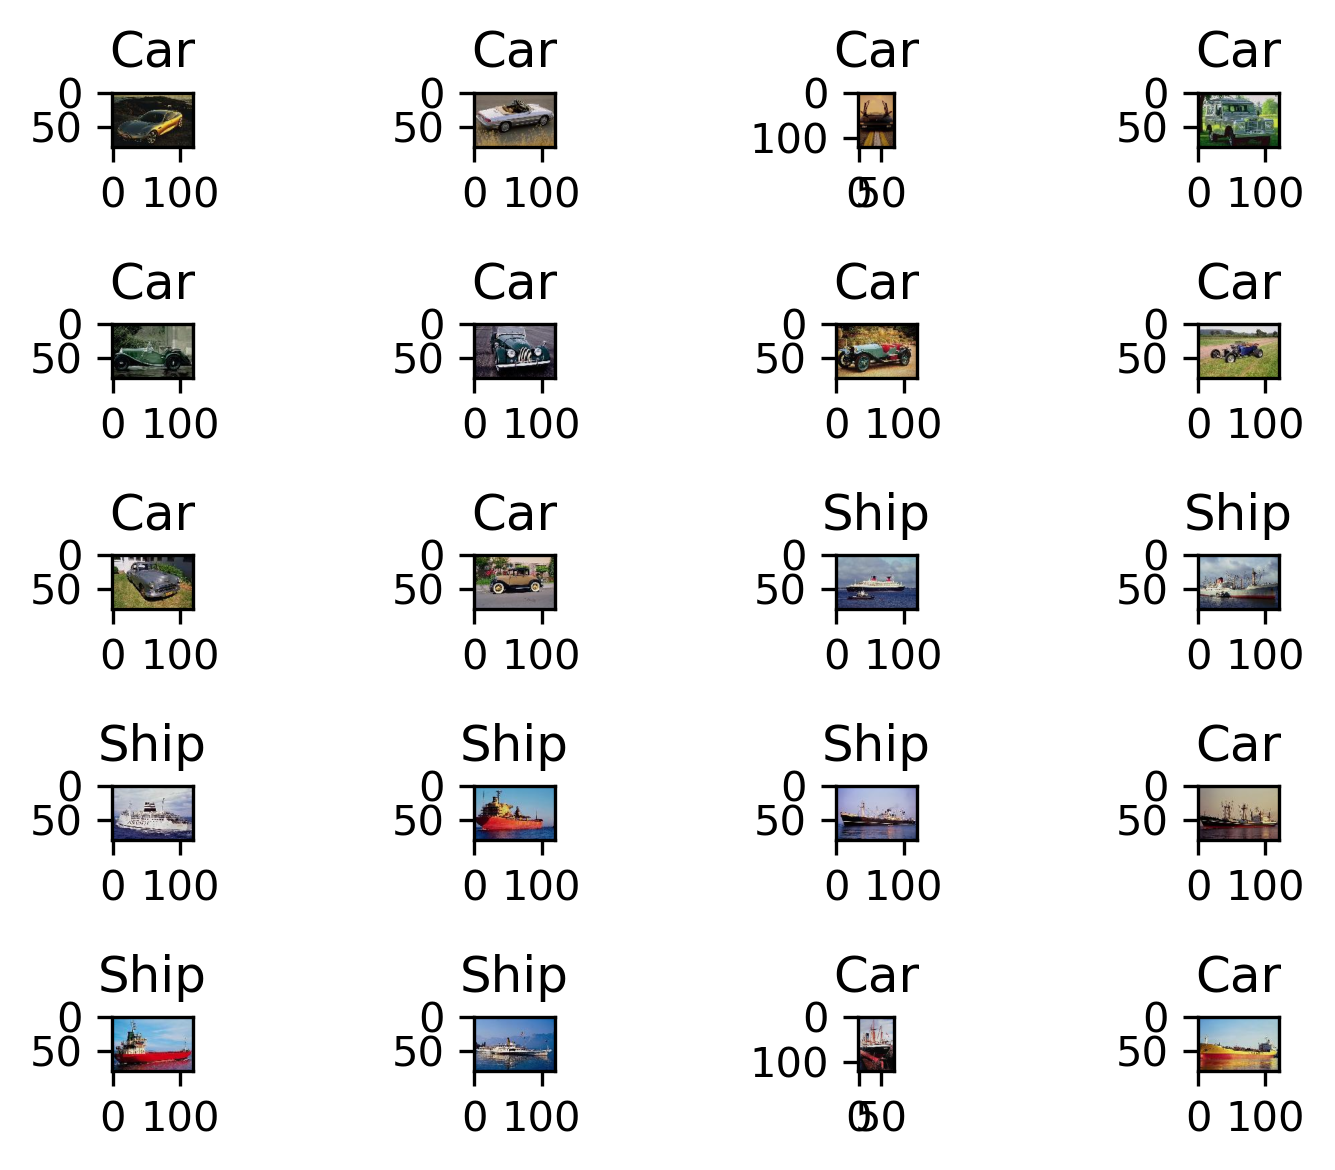

In [54]:

fig=plt.figure(figsize=(5, 4), dpi=300)

for i in range(1, classpediteSVM.shape[0] + 1):
    img = loaded_images[i-1]
    
    ax = fig.add_subplot(5, 4, i)
    
    ax.imshow(img)
    if classpediteSVM[i-1] == 0:    
        ax.set_title("Car")
    else:
        ax.set_title("Ship")
    
fig.tight_layout()   
plt.show()



# KNN prediction :

In [49]:
classpediteKNN = model_KNN.predict(topredict)

classpediteKNN

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0.])

In [50]:
imagepredite_classKNN = {}

for i in range(len(loaded_images)):
    img_data = image.imread(path+'/' + filename)
    
    imagepredite_classKNN[i] = [filename, classpediteKNN[i]]

In [51]:
imagepredite_classKNN

{0: ['535099.jpg', 0.0],
 1: ['535099.jpg', 0.0],
 2: ['535099.jpg', 0.0],
 3: ['535099.jpg', 0.0],
 4: ['535099.jpg', 0.0],
 5: ['535099.jpg', 0.0],
 6: ['535099.jpg', 0.0],
 7: ['535099.jpg', 0.0],
 8: ['535099.jpg', 0.0],
 9: ['535099.jpg', 0.0],
 10: ['535099.jpg', 1.0],
 11: ['535099.jpg', 0.0],
 12: ['535099.jpg', 0.0],
 13: ['535099.jpg', 1.0],
 14: ['535099.jpg', 1.0],
 15: ['535099.jpg', 0.0],
 16: ['535099.jpg', 1.0],
 17: ['535099.jpg', 1.0],
 18: ['535099.jpg', 0.0],
 19: ['535099.jpg', 0.0]}

In [52]:
df = pd.DataFrame.from_dict(imagepredite_classKNN)

In [53]:
df.to_csv ('predicted_KNN.csv', index = False)

<a name='9'></a>


# Visualization des images et classes KNN

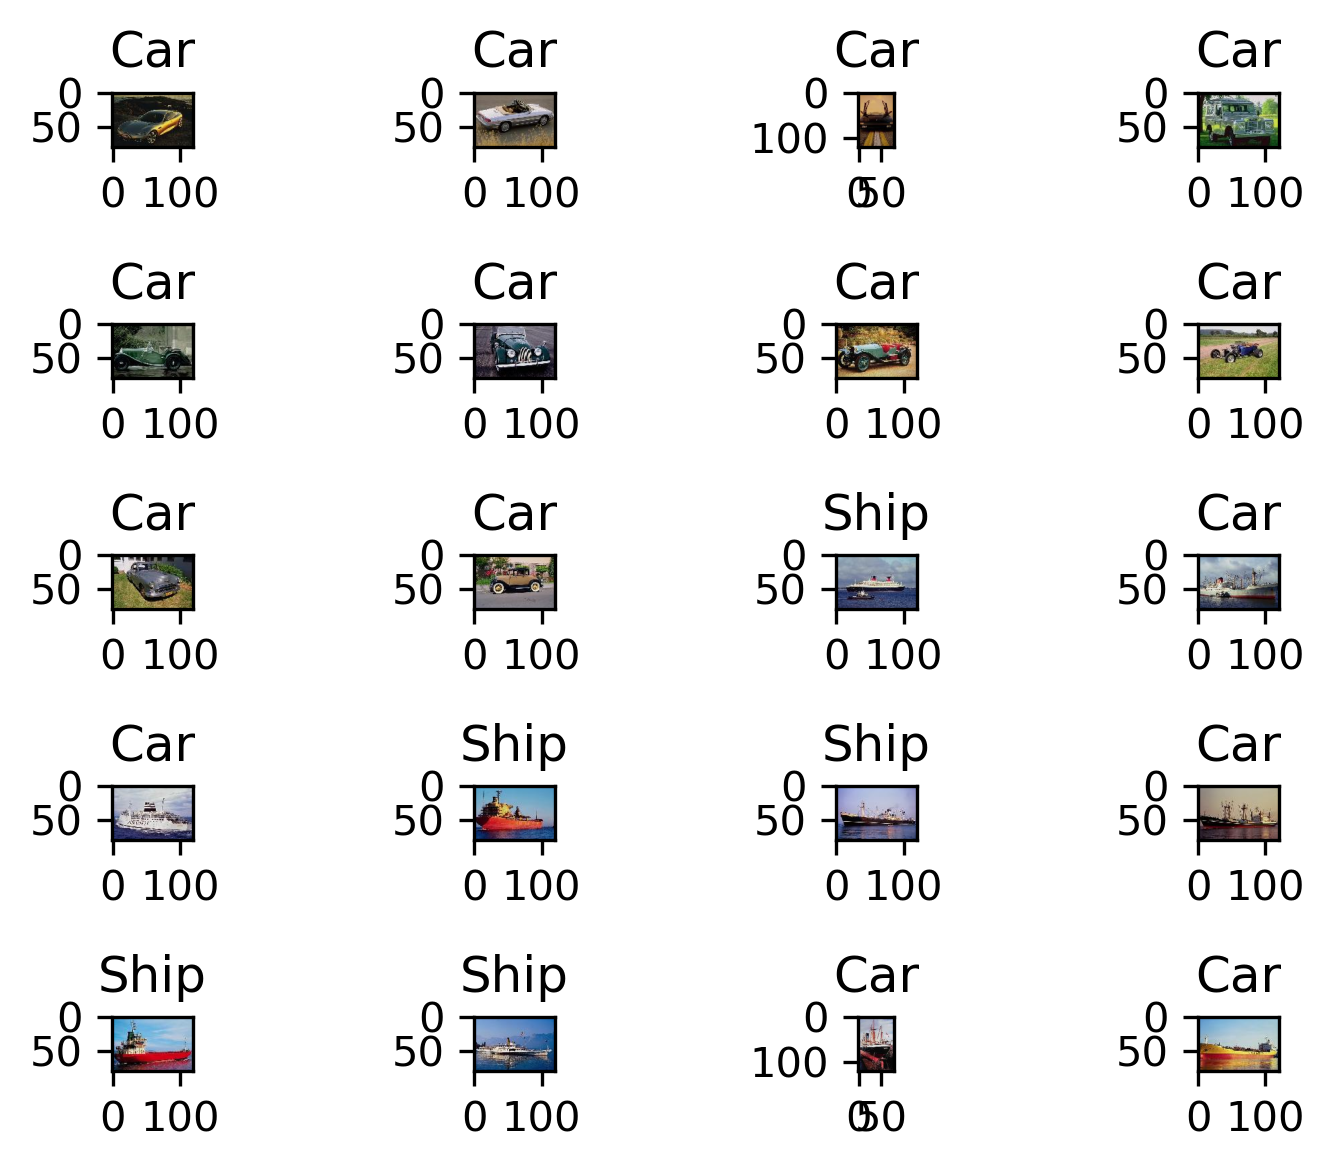

In [56]:
fig=plt.figure(figsize=(5, 4), dpi=300)

for i in range(1, classpediteKNN.shape[0] + 1):
    img = loaded_images[i-1]
    
    ax = fig.add_subplot(5, 4, i)
    
    ax.imshow(img)
    if classpediteKNN[i-1] == 0:    
        ax.set_title("Car")
    else:
        ax.set_title("Ship")
    
fig.tight_layout()   
plt.show()


# Decision tree Prediction

In [57]:
classpediteDT = model_DT.predict(topredict)

classpediteDT

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1.])

In [58]:
imagepredite_classDT = {}

for i in range(len(loaded_images)):
    img_data = image.imread(path+'/' + filename)
    
    imagepredite_classDT[i] = [filename, classpediteDT[i]]

In [59]:
imagepredite_classDT

{0: ['535099.jpg', 0.0],
 1: ['535099.jpg', 0.0],
 2: ['535099.jpg', 0.0],
 3: ['535099.jpg', 0.0],
 4: ['535099.jpg', 0.0],
 5: ['535099.jpg', 0.0],
 6: ['535099.jpg', 0.0],
 7: ['535099.jpg', 0.0],
 8: ['535099.jpg', 0.0],
 9: ['535099.jpg', 1.0],
 10: ['535099.jpg', 1.0],
 11: ['535099.jpg', 1.0],
 12: ['535099.jpg', 1.0],
 13: ['535099.jpg', 1.0],
 14: ['535099.jpg', 1.0],
 15: ['535099.jpg', 0.0],
 16: ['535099.jpg', 0.0],
 17: ['535099.jpg', 1.0],
 18: ['535099.jpg', 1.0],
 19: ['535099.jpg', 1.0]}

In [62]:
df = pd.DataFrame.from_dict(imagepredite_classDT)

In [63]:
df.to_csv ('predicted_DT.csv', index = False)

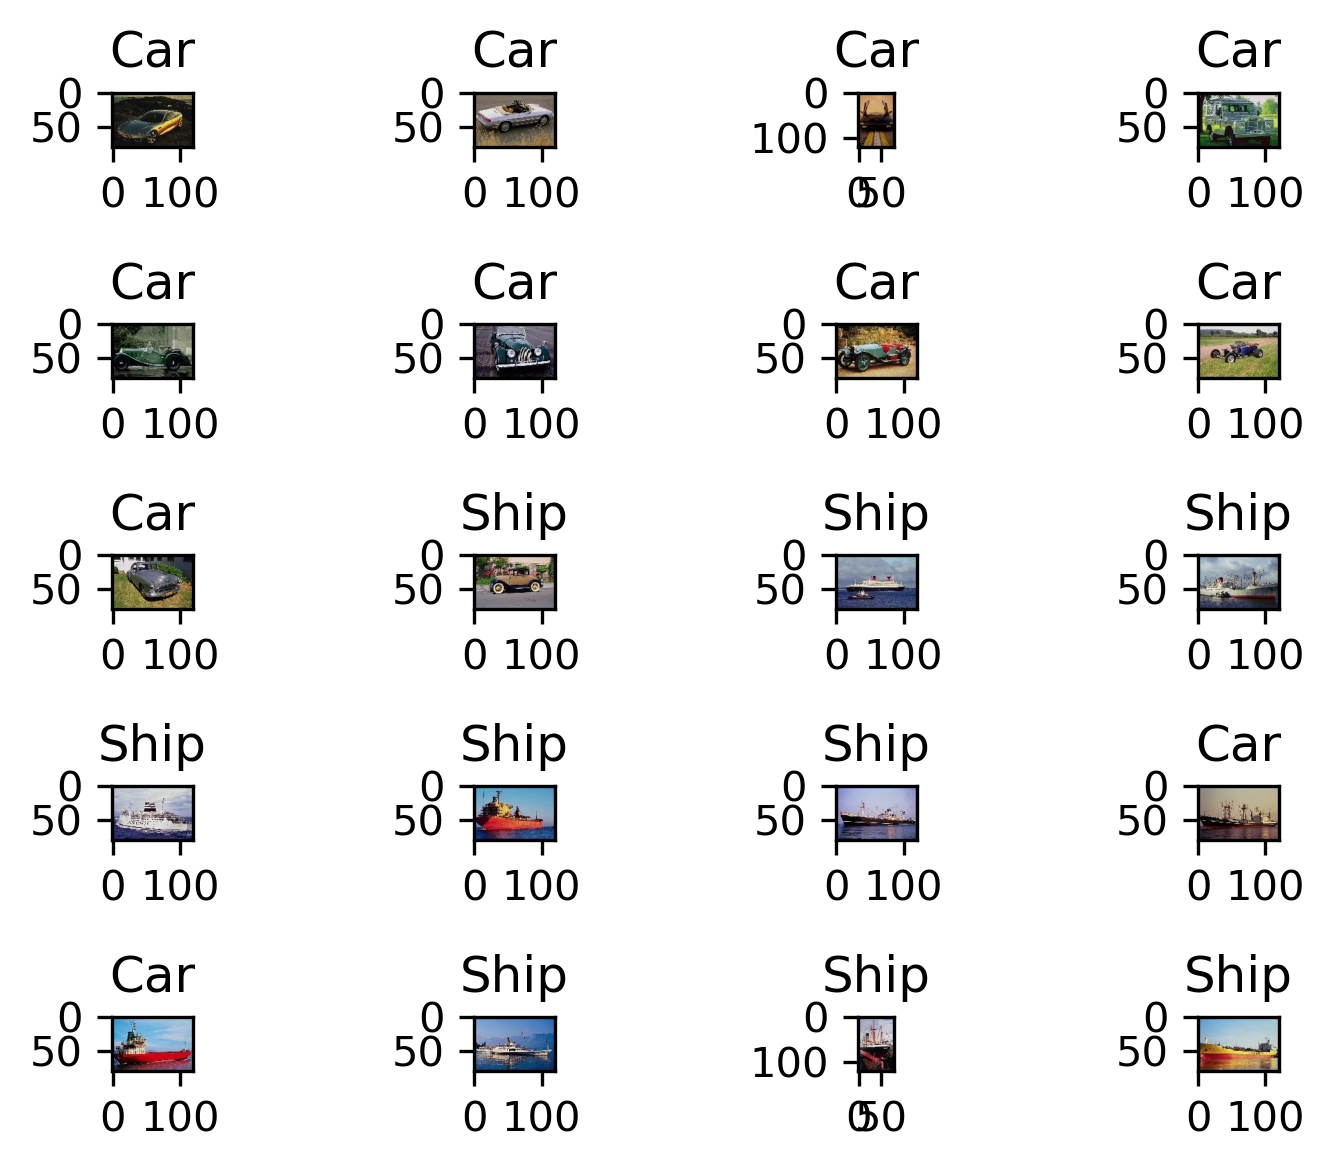

In [60]:
fig=plt.figure(figsize=(5, 4), dpi=300)

for i in range(1, classpediteDT.shape[0] + 1):
    img = loaded_images[i-1]
    
    ax = fig.add_subplot(5, 4, i)
    
    ax.imshow(img)
    if classpediteDT[i-1] == 0:    
        ax.set_title("Car")
    else:
        ax.set_title("Ship")
    
fig.tight_layout()   
plt.show()